In [1]:
# Import libraries 
import csv 
import sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import numpy.polynomial.polynomial as poly

# Experiment 1 
First we are going to load the data from *male400.csv* and create a scatter plot 

Data


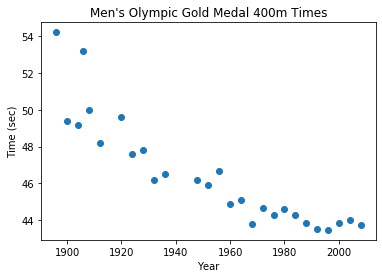

In [2]:
data = pd.read_csv("male400.csv")
figure, axes = plt.subplots()
scatter_plt = axes.scatter(data["Year"], data["Time"])
axes.set_title("Men's Olympic Gold Medal 400m Times")
axes.set_xlabel("Year")
axes.set_ylabel("Time (sec)")
print("Data")

## Conclusion 1
The data has a clear downward trend over the years, but the relationship doesn't seem perfectly linear. The trend seems to decrease asypmtotically, perhaps a polynomial trend. 

# Experiment 2
Next, we are going to use linear regression to fit a line to the data. We will: 
1. add the line to the scatter plot
2. compute the average squared loss (MSE) for this linear model

y-intercept = 190.52859572143672
slope = -0.0737855614159197
Mean Squared Error = 1.578033172446933


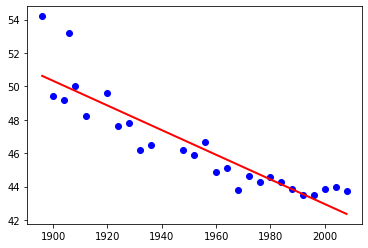

In [3]:
# Find the best fit line 
df = pd.read_csv("male400.csv") # read data, this time x is the feature (year) t is the target (time)
x = df["Year"].to_numpy()
t = df["Time"].to_numpy()
m, b = np.polyfit(x, t, 1) # polyfit() finds the best fit line. Third param is for degree of fitting polynomial
print("y-intercept =", b)
print("slope =", m)

# Add best fit line to the scatter plot 
line_func = m * x + b
plt.plot(x, t, 'bo')
plt.plot(x, line_func, 'r', linewidth=2)

# Now find the MSE for the best fit line 
y_bar = []
for yr in range(len(x)):
    prediction = m * x[yr] + b # Line function evaluated at x (year) gives the predicted value 
    y_bar.append(prediction)
mse_lin = np.square(np.subtract(t, y_bar)).mean()

print("Mean Squared Error =", mse_lin)

## Conclusion 2
Now we see that the linear function of the data can be written as *y = m * x + b*, where

*y* = predicted time, *m* = slope, *x* = year (features), *b* = y-intercept 

The function of our model is **y = -0.074x + 190.529** and the MSE is about 1.578

# Experiment 3 
Now we are going to try and improve our model, we will: 
1. Fit a 3rd order polynomial to the data 
2. Compare the average squared loss for this model with that of the linear model 

3rd Degree Model MSE = 0.9738943979975552
Linear Model MSE = 1.578033172446933
Difference: -0.6041387744493778


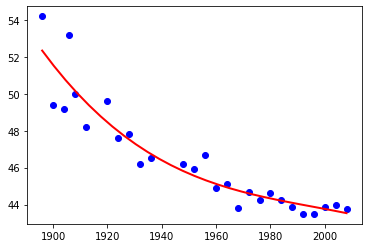

In [4]:
# Create a 3rd degree polynomial 
x_deg_3 = np.linspace(x[0], x[-1], num=len(x))[:, None]
coefs_deg_3 = poly.polyfit(x, t, 3)
vals_deg_3 = poly.polyval(x_deg_3, coefs_deg_3)

# Plot data with 3rd degree polynomial 
plt.plot(x, t, 'bo')
plt.plot(x_deg_3, vals_deg_3, 'r', linewidth=2)

# Find MSE for 3rd degree polynomial 
y_bar_deg_3 = []
for yr in range(len(x)):
    prediction = ((x[yr]**3) * coefs_deg_3[3]) + ((x[yr]**2) * coefs_deg_3[2]) + (x[yr] * coefs_deg_3[1]) + coefs_deg_3[0]
    y_bar_deg_3.append(prediction)
mse_deg_3 = np.square(np.subtract(t, y_bar_deg_3)).mean()

# Print results
print("3rd Degree Model MSE =", mse_deg_3)
print("Linear Model MSE =", mse_lin)
print("Difference:", mse_deg_3 - mse_lin)

## Conclusion 3
As we can see, the 3rd degree model seems to fit the data better than our linear model. We can confirm this by looking at the MSE. In the linear model we had an MSE of about 1.578, with a 3rd degree model we get an MSE of about 0.974. We can be confident that the 3rd degree model will be a better predictor.

# Experiment 4
We are going to keep trying to improve our model, this time we will: 
1. Fit a 5th order polynomial to the data
2. Compare the mean squared error with that of the other models 

5th Degree Model MSE = 0.9232230235120531
3rd Degree Model MSE = 0.9738943979975552
Linear Model MSE = 1.578033172446933
Degree 5 - Linear: -0.6548101489348799
Degree 5 - Degree 3: -0.050671374485502074


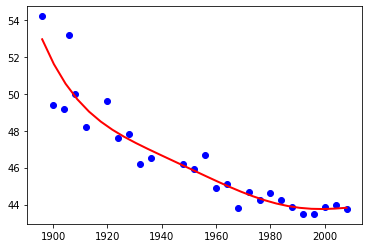

In [5]:
# Create a 5th degree polynomial 
x_deg_5 = np.linspace(x[0], x[-1], num=len(x))[:, None]
coefs_deg_5 = poly.polyfit(x, t, 5)
vals_deg_5 = poly.polyval(x_deg_5, coefs_deg_5)

# Plot data with 5th degree polynomial 
plt.plot(x, t, 'bo')
plt.plot(x_deg_5, vals_deg_5, 'r', linewidth=2)

# Find MSE for 5th degree polynomial 
y_bar_deg_5 = []
for yr in range(len(x)):
    prediction = ((x[yr]**5) * coefs_deg_5[5]) + ((x[yr]**4) * coefs_deg_5[4]) + ((x[yr]**3) * coefs_deg_5[3]) + ((x[yr]**2) * coefs_deg_5[2]) + (x[yr] * coefs_deg_5[1]) + coefs_deg_5[0]
    y_bar_deg_5.append(prediction)
mse_deg_5 = np.square(np.subtract(t, y_bar_deg_5)).mean()

# Print results
print("5th Degree Model MSE =", mse_deg_5)
print("3rd Degree Model MSE =", mse_deg_3)
print("Linear Model MSE =", mse_lin)
print("Degree 5 - Linear:", mse_deg_5 - mse_lin)
print("Degree 5 - Degree 3:", mse_deg_5 - mse_deg_3)

## Conclusion 4
We can see that the difference between a linear and a polynomial model is far greater than the difference between a 3rd order and a 5th order polynomial funcion. By having a 5th order polynomial, we are adding variance to our model, but we are only reducing the mean squared error by a small margin 

# Experiment 5
We are now going to plot the 3rd and 5th order polynomials side by side to see which one looks like a better model of the data. 

Different order polynomials


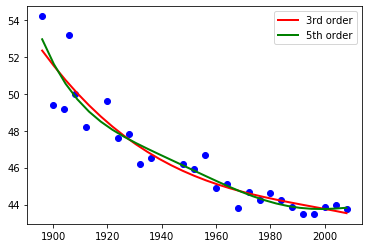

In [6]:
# Plot data with 3rd and 5th order polynomials
plt.plot(x, t, 'bo')
plt.plot(x_deg_3, vals_deg_3, 'r', label='3rd order', linewidth=2)
plt.plot(x_deg_5, vals_deg_5, 'g', label='5th order', linewidth=2)
plt.legend()
print("Different order polynomials")

## Conclusion 5
Our 5th order polynomial model seems to better describe the data. The models describe the data similarly, but they differ around the 1930's and 1960's, when 400m times didn't really improve until the 1960 Olympics. The 5th order model captures this part of the data better than the 3rd order model. Also, as we approach the 2000's, 400m times fluctuate around 43 and 44 seconds, again, the 5th degree model does a better job at describing the data than the 3rd degree model. This is expected from these plots since we are increasing the complexity of our model by increasing the degree of the polynomial. A good question to ask is if if the 5th degree model is overfitting our data. 

# Experiment 6
Finally, we will add L2 regularization (ridge regression) to our models. We are going to fit 5th order polynomials for each of:  
Lambda = 0.01, 0.1, 1, 10, 100

Then we will plot each model on a scatterplot of the data to see what value of Lambda seems to fit the data the best 

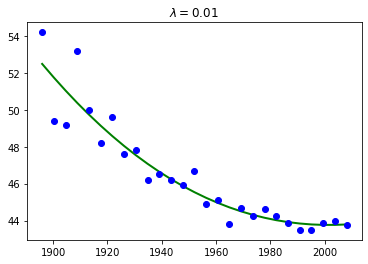

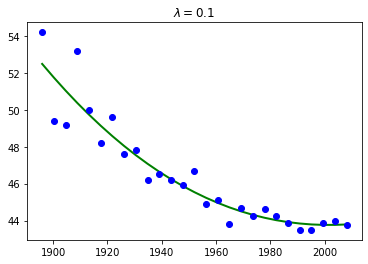

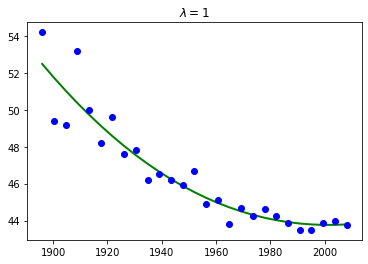

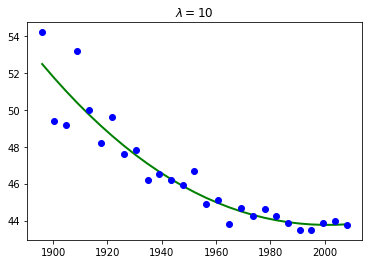

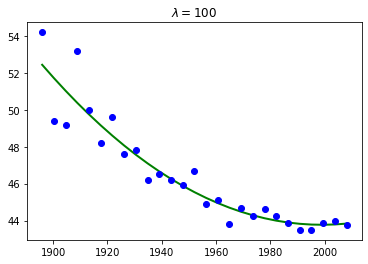

In [7]:
# Create an array of Lambda values 
Lambs = [0.01, 0.1, 1, 10, 100]

# create X matrix 
max_order = 5 
x_test = np.linspace(x[0], x[-1], num=len(x_deg_5))[:, None]
X = np.ones_like(x_deg_5)
X_test = np.ones_like(x_test)
for i in range(1, max_order + 1): 
    X = np.hstack((X, x_deg_5**i))
    X_test = np.hstack((X_test, x_test**i))

# Create a model with increasing values of Lambda
for lamb in Lambs:
    w = np.linalg.solve(X.T.dot(X) + len(x_deg_5)*lamb*np.identity(max_order + 1), X.T.dot(t))
    f_test = X_test.dot(w)
    plt.figure()
    plt.plot(x_test, f_test, 'g', linewidth=2)
    plt.plot(x_deg_5, t, 'bo')
    title = '$\lambda=$%g' %lamb
    plt.title(title)

## Conclusion 6
as we can see, there is an insignificant difference among the different values of Lambda. Normally, the lower value for Lambda will result in a more complex model, then as we increase the value of Lambda, we penalize large coefficients and end up with a simpler model. In our example, I did not normalize the coefficients or the features so even a small value for lambda added a significant penalty to the model (features have values of 1896 and up). In this case, we can get away with choosing 100 for the value of Lambda since it gives us the simplest model while maintaining the accuracy of predictions.